In [18]:
import numpy as np
import spatialmath as sm
from math import pi, sin, cos, cosh, sinh, sqrt, tan,radians
import roboticstoolbox as rtb



In [19]:
robot = rtb.models.DH.Puma560()

print(robot)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴──

In [20]:
def FK(q):

    H01 = sm.SE3.Rz(q[0]) * sm.SE3(0,0,0.6718) * sm.SE3.Rx(90,unit='deg')
    
    H12 = sm.SE3.Rz(q[1]) * sm.SE3(0.4318,0,0) 

    H23 = sm.SE3.Rz(q[2]) * sm.SE3(0,0,0.15) * sm.SE3(0.0203,0,0) * sm.SE3.Rx(-90,unit='deg') 
    
    H34 = sm.SE3.Rz(q[3]) * sm.SE3(0,0,0.4318) * sm.SE3.Rx(90,unit='deg')

    H45 = sm.SE3.Rz(q[4]) * sm.SE3.Rx(-90,unit='deg') 
    
    H56 = sm.SE3.Rz(q[5]) 

    T = H01 * H12 * H23 * H34 * H45 * H56
    
    
    return T
q = [pi/6,0,pi/2,pi/4,0,0]
R = sm.SE3.Rx(0.3) * sm.SE3.Rz(0.2)
print(R.eulervec())



[ 0.29899633 -0.0299997   0.19849575]


In [21]:
# Jacobi matrix

def jocob_matrix(q):
    
    H01 = sm.SE3.Rz(q[0]) * sm.SE3(0,0,0.6718) * sm.SE3.Rx(90,unit='deg')
    
    H12 = sm.SE3.Rz(q[1]) * sm.SE3(0.4318,0,0) 

    H23 = sm.SE3.Rz(q[2]) * sm.SE3(0,0,0.15) * sm.SE3(0.0203,0,0) * sm.SE3.Rx(-90,unit='deg') 
    
    H34 = sm.SE3.Rz(q[3]) * sm.SE3(0,0,0.4318) * sm.SE3.Rx(90,unit='deg')

    H45 = sm.SE3.Rz(q[4]) * sm.SE3.Rx(-90,unit='deg') 
    
    H56 = sm.SE3.Rz(q[5]) 
    T = H01 * H12 * H23 * H34 * H45 * H56
    z00 = np.array([0,0,1])
    z01 = np.dot(H01.R ,z00.reshape(-1,1))
    z02 = np.dot((H01*H12).R,z00.reshape(-1,1))
    z03 = np.dot((H01*H12*H23).R,z00.reshape(-1,1))
    z04 = np.dot((H01*H12*H23*H34).R,z00.reshape(-1,1))
    z05 = np.dot((H01*H12*H23*H34*H45).R,z00.reshape(-1,1))
    p0_n = T.t
    p0_0 = z00
    p0_1 = H01.t
    p0_2 = (H01*H12).t
    p0_3 = (H01*H12*H23).t
    p0_4 = (H01*H12*H23*H34).t
    p0_5 = (H01*H12*H23*H34*H45).t
    
    J1 = np.concatenate((np.cross(z00,p0_n - p0_0),z00),axis=0).reshape(-1,1)
    J2 = np.concatenate((np.cross(z01.reshape(3),p0_n - p0_1),z01.reshape(3)),axis=0).reshape(-1,1)
    J3 = np.concatenate((np.cross(z02.reshape(3),p0_n - p0_2),z02.reshape(3)),axis=0).reshape(-1,1)
    J4 = np.concatenate((np.cross(z03.reshape(3),p0_n - p0_3),z03.reshape(3)),axis=0).reshape(-1,1)
    J5 = np.concatenate((np.cross(z04.reshape(3),p0_n - p0_4),z04.reshape(3)),axis=0).reshape(-1,1)
    J6 = np.concatenate((np.cross(z05.reshape(3),p0_n - p0_5),z05.reshape(3)),axis=0).reshape(-1,1)
    J = np.concatenate((J1,J2,J3,J4,J5,J6),axis=1)
    return J
q = [pi/6,0,pi/2,pi/4,0,0]
J = jocob_matrix(q)
print(J.round(4))
print(robot.jacob0(q).round(4))

[[ 0.1299 -0.0176 -0.0176  0.     -0.     -0.    ]
 [ 0.075  -0.0101 -0.0102 -0.      0.      0.    ]
 [-0.      0.     -0.4318  0.      0.      0.    ]
 [ 0.      0.5     0.5    -0.866   0.3536 -0.866 ]
 [ 0.     -0.866  -0.866  -0.5    -0.6124 -0.5   ]
 [ 1.      0.      0.      0.      0.7071  0.    ]]
[[ 0.1299 -0.0176 -0.0176  0.      0.      0.    ]
 [ 0.075  -0.0102 -0.0102  0.      0.      0.    ]
 [-0.     -0.     -0.4318  0.      0.      0.    ]
 [-0.      0.5     0.5    -0.866   0.3536 -0.866 ]
 [ 0.     -0.866  -0.866  -0.5    -0.6124 -0.5   ]
 [ 1.     -0.     -0.      0.      0.7071  0.    ]]


[ 0.02  -0.15   1.535  0.     0.     0.   ]


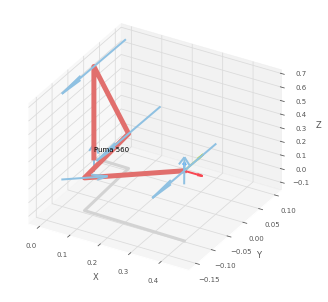

<Figure size 432x288 with 0 Axes>

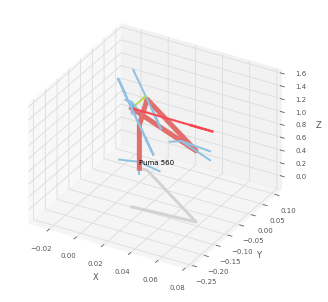

<Figure size 432x288 with 0 Axes>

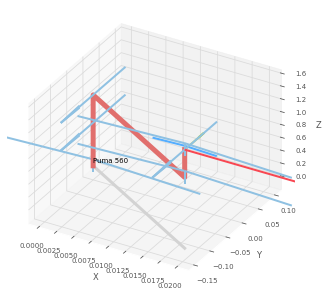

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 432x288 with 0 Axes>

In [69]:
# IK

class config:
    def __init__(self,lr,max_step) :
        self.lr = lr
        self.max_step = max_step

    def set_lr(self,lr):
        self.lr = lr
    def set_step(self,max_step):
        self.max_step = max_step
    def set_limit(self,limit_min,limit_max):
        self.limit_min = limit_min
        self.limit_max = limit_max

        
#┌────┬────────┬────────┬────────┬─────────┬────────┐
# │θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
# ├────┼────────┼────────┼────────┼─────────┼────────┤
# │ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
# │ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
# │ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
# │ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
# │ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
# │ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
# └────┴────────┴────────┴────────┴─────────┴────────┘

#x' = J q' x is pose of the end-effector

class slover:


    # initial parameters
    # input :   type1 ------ choose  optimal algorithm ----- > Gradient descent / Levon Marquardt
    #           type2 -------- choose how to deal the Jacob matrix
    #           config  ----------  config 
    def __init__(self,type1,type2,config):
        self.type1 = type1
        self.type2 = type2
        self.config = config
    
    # puma560 forward kinematics
    # input :   q --------- six joint angle(rad)
    # ouput :   T(SE3) --------- end-effector pose
    def fkine(self,q):
        H01 = sm.SE3.Rz(q[0]) * sm.SE3(0,0,0.6718) * sm.SE3.Rx(90,unit='deg')
    
        H12 = sm.SE3.Rz(q[1]) * sm.SE3(0.4318,0,0) 

        H23 = sm.SE3.Rz(q[2]) * sm.SE3(0,0,0.15) * sm.SE3(0.0203,0,0) * sm.SE3.Rx(-90,unit='deg') 
        
        H34 = sm.SE3.Rz(q[3]) * sm.SE3(0,0,0.4318) * sm.SE3.Rx(90,unit='deg')

        H45 = sm.SE3.Rz(q[4]) * sm.SE3.Rx(-90,unit='deg') 
        
        H56 = sm.SE3.Rz(q[5]) 

        T = H01 * H12 * H23 * H34 * H45 * H56
        return T
    
    # puma 560 jacob matrix 
    # input :     q --------- six joint angle(rad)
    # output :    J(numpy) --------- jacob matrix
    def jacob_matrix(self,q):
        H01 = sm.SE3.Rz(q[0]) * sm.SE3(0,0,0.6718) * sm.SE3.Rx(90,unit='deg')
    
        H12 = sm.SE3.Rz(q[1]) * sm.SE3(0.4318,0,0) 

        H23 = sm.SE3.Rz(q[2]) * sm.SE3(0,0,0.15) * sm.SE3(0.0203,0,0) * sm.SE3.Rx(-90,unit='deg') 
        
        H34 = sm.SE3.Rz(q[3]) * sm.SE3(0,0,0.4318) * sm.SE3.Rx(90,unit='deg')

        H45 = sm.SE3.Rz(q[4]) * sm.SE3.Rx(-90,unit='deg') 
        
        H56 = sm.SE3.Rz(q[5]) 
        T = H01 * H12 * H23 * H34 * H45 * H56
        z00 = np.array([0,0,1])
        z01 = np.dot(H01.R ,z00.reshape(-1,1))
        z02 = np.dot((H01*H12).R,z00.reshape(-1,1))
        z03 = np.dot((H01*H12*H23).R,z00.reshape(-1,1))
        z04 = np.dot((H01*H12*H23*H34).R,z00.reshape(-1,1))
        z05 = np.dot((H01*H12*H23*H34*H45).R,z00.reshape(-1,1))
        p0_n = T.t
        p0_0 = z00
        p0_1 = H01.t
        p0_2 = (H01*H12).t
        p0_3 = (H01*H12*H23).t
        p0_4 = (H01*H12*H23*H34).t
        p0_5 = (H01*H12*H23*H34*H45).t
        
        J1 = np.concatenate((np.cross(z00,p0_n - p0_0),z00),axis=0).reshape(-1,1)
        J2 = np.concatenate((np.cross(z01.reshape(3),p0_n - p0_1),z01.reshape(3)),axis=0).reshape(-1,1)
        J3 = np.concatenate((np.cross(z02.reshape(3),p0_n - p0_2),z02.reshape(3)),axis=0).reshape(-1,1)
        J4 = np.concatenate((np.cross(z03.reshape(3),p0_n - p0_3),z03.reshape(3)),axis=0).reshape(-1,1)
        J5 = np.concatenate((np.cross(z04.reshape(3),p0_n - p0_4),z04.reshape(3)),axis=0).reshape(-1,1)
        J6 = np.concatenate((np.cross(z05.reshape(3),p0_n - p0_5),z05.reshape(3)),axis=0).reshape(-1,1)
        J = np.concatenate((J1,J2,J3,J4,J5,J6),axis=1)
        return J
    
    # T -> [x,y,z,thetax,thetay,thetaz]
    # input : T --------- SE3
    # output : pose(numpy) ------------ [x,y,z,thetax,thetay,thetaz]
    def trans_pose(self,T):
        t = T.t
        r = T.eulervec()
        pose = np.concatenate((t,r))
        return pose
    
    #def AS_solver(self,q0,Td):



    # Gradient descent method
    # input :  q0  -------------- initial end-effector pose (array)
    #          xd  --------------- target end-effector pose (array)
    def LM_solver(self,q0,Td):
        T = self.fkine(q0)
        J = self.jacob_matrix(q0)
        x = self.trans_pose(T)
        x_d = self.trans_pose(Td)
        delta_x = xd - x
        alpha = 0.1
        delta_theta = alpha * np.dot(J.T,delta_x)
        iter = 0
        miu = 1
        q0 = q0 + delta_theta
        while iter < 3000:
            T = self.fkine(q0)
            
            J = self.jacob_matrix(q0)
            
            x = self.trans_pose(T)
            delta_x = xd - x

            # modification 
            
            left_f = np.dot(J.T,J) + miu * np.eye(6)
            right_f = J.T
            
            f = np.dot(np.linalg.inv(left_f),right_f)

            delta_theta = alpha * np.dot(f,delta_x)
            # update miu
            x_next = self.trans_pose(self.fkine(q0 + delta_theta))
            #ro = np.dot((x_next - x),np.linalg.inv(np.dot(J,delta_theta)))
            ro = np.linalg.norm(x_next - x) / np.linalg.norm(np.dot(J,delta_theta))
            if ro > 0.75:
                miu = 2*miu
            elif ro < 0.25:
                miu = 0.5*miu
            
            if(miu > 10):
                miu = 10
            
            q0 = q0 +delta_theta
            
            iter += 1
        

        # judge limitation
        for i in range(6):
            if q0[i] > self.config.limit_max[i] or q0[i] < self.config.limit_min[i]:
                if q0[i] > self.config.limit_max[i]:
                    q0[i] = self.config.limit_max[i]
                if q0[i] < self.config.limit_min[i]:
                    q0[i] = self.config.limit_min[i]
                print("ERROR",i+1,"th joint restriction")
                #return None
        #print(delta_x)
        return q0


    def GD_solver(self,q0,Td):
        

        T = self.fkine(q0)
        J = self.jacob_matrix(q0)
        x = self.trans_pose(T)
        xd = self.trans_pose(Td)
        delta_x = xd - x
        alpha = 0.1
        delta_theta = alpha * np.dot(J.T,delta_x)
        i =0
        #iteration solve
        while i < 1000:
            T = self.fkine(q0 + delta_theta)
            J = self.jacob_matrix(q0+delta_theta)
            
            x = self.trans_pose(T)
            delta_x = xd - x


            delta_theta = alpha * np.dot(J.T,delta_x)
            q0 = q0 +delta_theta
            #print(delta_theta.round(4))
            i += 1
        #print(delta_x.round(4))

        # judge limitation
        for i in range(6):
            if q0[i] > self.config.limit_max[i] or q0[i] < self.config.limit_min[i]:
                if q0[i] > self.config.limit_max[i]:
                    q0[i] = self.config.limit_max[i]
                if q0[i] < self.config.limit_min[i]:
                    q0[i] = self.config.limit_min[i]
                print("ERROR",i+1,"th joint restriction")
                #return None
        return q0


    def ikine(self,q0,xd):
        if self.type1 == 'GD':
            return self.GD_solver(q0,xd)
        if self.type1 == 'LM':
            return self.LM_solver(q0,xd)
        
qz = robot.qz
xd = [ 0.4521  ,-0.15005 , 0.5 , 0.0,      0.0    ,   0.0     ]
#config initial
#┌────┬────────┬────────┬────────┬─────────┬────────┐
# │θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
# ├────┼────────┼────────┼────────┼─────────┼────────┤
# │ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
# │ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
# │ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
# │ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
# │ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
# │ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
# └────┴────────┴────────┴────────┴─────────┴────────┘

config1 = config(0.1,1000)
limit_min = np.array([radians(-160),radians(-110),radians(-135),radians(-266),radians(-100),radians(-266)])
limit_max = np.array([radians(160),radians(110),radians(135),radians(266),radians(100),radians(266)])
config1.set_limit(limit_min,limit_max)
# solver initial
solver_t = slover('LM','none',config1)


q = robot.qr
Td = solver_t.fkine(q)
print(solver_t.trans_pose(Td).round(3))

q_dt = solver_t.ikine(qz,Td)
# print(limit_max.round(4))
# print(limit_min.round(4))
# print(q_dt.round(3))
#print(q_d.round(4))
#print(solver_t.fkine(q_dt))
robot.plot(q_dt)

# correct algorithm

T_ = robot.ik_NR(robot.fkine(robot.qr))
robot.plot(T_[0])

robot.plot(robot.qr)
# print(T_)



